In [1]:
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers

from obspy.signal import trigger


In [2]:
path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

startdate = obspy.UTCDateTime('2019-05-15T00:00:00Z')
enddate = obspy.UTCDateTime('2019-05-25T00:00:00Z')

st = helpers.get_stream_subsample_between_dates(path, startdate=startdate, enddate=enddate)

In [3]:
# p = 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.2'
# st = helpers.get_stream_subsample_between_dates('/media/sda/data/borehole/'+p, startdate, enddate)

In [4]:
# st

In [5]:
# p = 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.5'
# st = helpers.get_stream_subsample_between_dates('/media/sda/data/borehole/'+p, startdate, enddate)
# st

In [6]:
# paths = ['queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'
#          , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.1'
#          , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.2'
#          , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.3'
#          , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.4'
#          , 'queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404.5'
#         ,'queryauth?net=7F&sta=B00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404']

# for p in paths:
#     if 'st' not in locals():
#         st = helpers.get_stream_subsample_between_dates('/media/sda/data/borehole/'+p, startdate, enddate)
#     else:
#         st = st + helpers.get_stream_subsample_between_dates('/media/sda/data/borehole/'+p, startdate, enddate)

In [7]:
st

12 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-16T07:38:41.862001Z | 1000.0 Hz, 72617262 samples
7F.A00.01.GDH | 2019-05-16T07:38:41.863001Z - 2019-05-17T03:48:30.864001Z | 1000.0 Hz, 72589002 samples
7F.A00.01.GDH | 2019-05-17T03:48:30.865000Z - 2019-05-17T23:58:15.692000Z | 1000.0 Hz, 72584828 samples
7F.A00.01.GDH | 2019-05-17T23:58:15.693000Z - 2019-05-18T20:07:54.115000Z | 1000.0 Hz, 72578423 samples
7F.A00.01.GDH | 2019-05-18T20:07:54.116000Z - 2019-05-19T16:19:01.719000Z | 1000.0 Hz, 72667604 samples
7F.A00.01.GDH | 2019-05-19T16:19:01.719999Z - 2019-05-20T12:30:07.718999Z | 1000.0 Hz, 72666000 samples
7F.A00.01.GDH | 2019-05-20T12:30:07.720000Z - 2019-05-21T08:40:26.844000Z | 1000.0 Hz, 72619125 samples
7F.A00.01.GDH | 2019-05-21T08:40:26.845001Z - 2019-05-22T04:52:32.339001Z | 1000.0 Hz, 72725495 samples
7F.A00.01.GDH | 2019-05-22T04:52:32.340000Z - 2019-05-23T01:03:52.673000Z | 1000.0 Hz, 72680334 samples
7F.A00.01.GDH | 2019-05-23T01:03:52.67400

In [8]:
st.merge()

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-25T13:36:19.667001Z | 1000.0 Hz, 871675067 samples

In [10]:
# https://docs.obspy.org/tutorial/code_snippets/downsampling_seismograms.html
st.decimate(factor=16)

1 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-15T11:28:24.601001Z - 2019-05-25T13:36:19.657001Z | 62.5 Hz, 54479692 samples

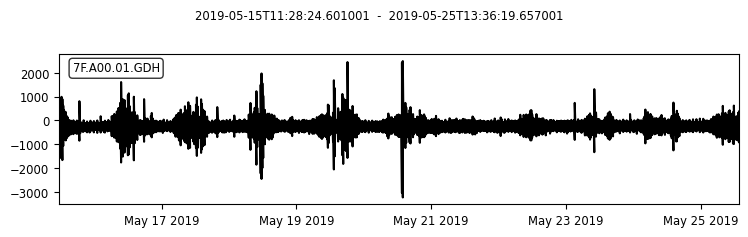

In [11]:
x = st.plot()

In [12]:
st.traces[0].stats.sampling_rate

62.5

In [13]:
cft = trigger.classic_sta_lta(st.traces[0].data, int(5*st.traces[0].stats.sampling_rate), int(10*st.traces[0].stats.sampling_rate))

In [14]:
cft.shape

(54479692,)

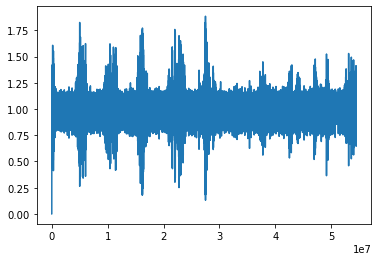

In [15]:
plt.plot(cft)

/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/obspy/signal/trigger.py:562: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


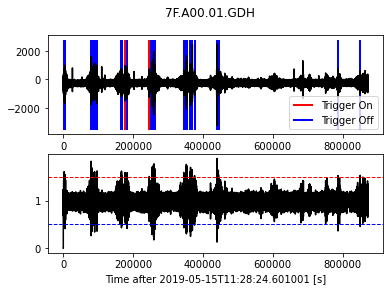

In [16]:
trigger.plot_trigger(st.traces[0], cft, 1.5, 0.5)

In [17]:
path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

startdate = obspy.UTCDateTime('2019-05-19T00:00:00Z')
enddate = obspy.UTCDateTime('2019-05-21T00:00:00Z')

st = helpers.get_stream_subsample_between_dates(path, startdate=startdate, enddate=enddate)

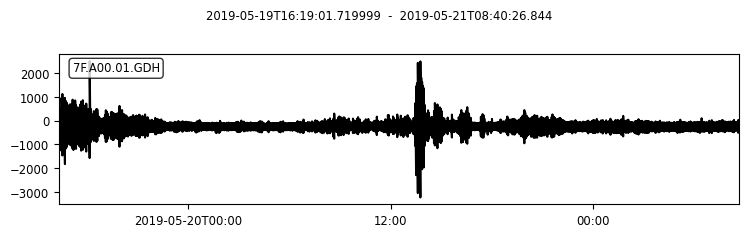

In [21]:
x = st.plot()

In [22]:
path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

startdate = obspy.UTCDateTime('2019-05-19T12:00:00Z')
enddate = obspy.UTCDateTime('2019-05-21T00:00:00Z')

st = helpers.get_stream_subsample_between_dates(path, startdate=startdate, enddate=enddate)

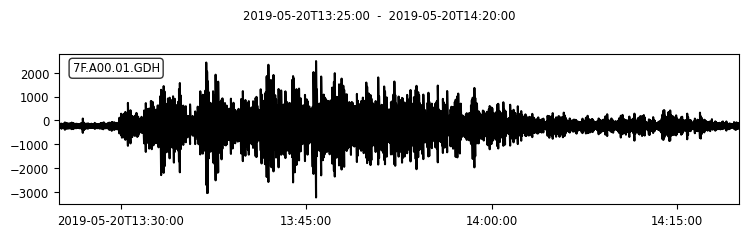

In [34]:
x = st.plot(starttime=obspy.UTCDateTime('2019-05-20T13:25:00Z'), endtime=obspy.UTCDateTime('2019-05-20T14:20:00Z'))

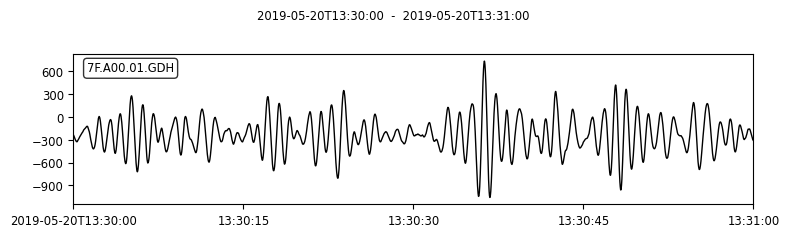

In [38]:
x = st.plot(starttime=obspy.UTCDateTime('2019-05-20T13:30:00Z'), endtime=obspy.UTCDateTime('2019-05-20T13:31:00Z'))
# maybe this is weird because of decimation

In [35]:
st[0].stats

         network: 7F
         station: A00
        location: 01
         channel: GDH
       starttime: 2019-05-19T16:19:01.719999Z
         endtime: 2019-05-20T12:30:07.718999Z
   sampling_rate: 1000.0
           delta: 0.001
            npts: 72666000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 12500, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 51200000})

In [36]:
st.decimate(factor=16)

2 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-19T16:19:01.719999Z - 2019-05-20T12:30:07.703999Z | 62.5 Hz, 4541625 samples
7F.A00.01.GDH | 2019-05-20T12:30:07.720000Z - 2019-05-21T08:40:26.840000Z | 62.5 Hz, 4538696 samples

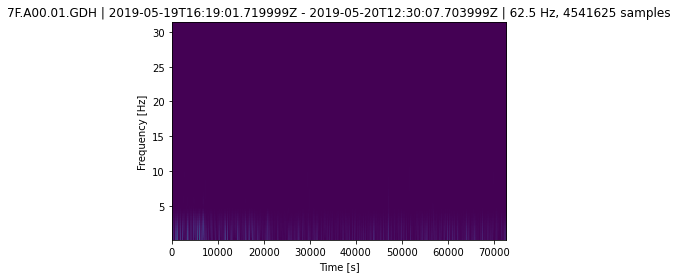

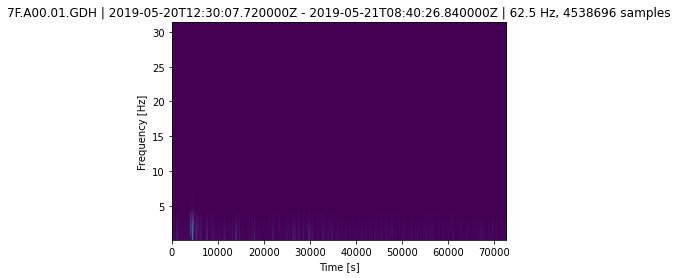

[None, None]

In [37]:
st.spectrogram()

In [ ]:
# x = st.traces[0].plot()

In [ ]:
# x = st.traces[1].plot()

In [ ]:
# st.merge()

In [ ]:
# x = st.plot()

In [ ]:
#https://discourse.obspy.org/t/large-miniseed-files-read-in-chunks/1109

# path = '/media/sda/data/borehole/queryauth?net=7F&sta=A00&cha=GDH&starttime=2019-01-01&endtime=2021-01-01&format=miniseed&nodata=404'

# i = 0

# streams = []

# reclen = 512
# # chunksize = 100000 * reclen # Around 50 MB
# chunksize = 100000 * reclen # Around 50 MB
# with io.open(path, "rb") as fh:
#     while True:
#         with io.BytesIO() as buf:
#             c = fh.read(chunksize)
            
#             if not c:
#                 break
#             buf.write(c)
#             buf.seek(0, 0)
            
#             if 'st' not in locals():
#                 st = obspy.read(buf)
#             else:
#                 st = st + obspy.read(buf)
# #             st = obspy.read(buf)
# #             streams.append(st)
# #             st = obspy.read(buf)
# #             if 'st' not in locals():
# #                 st = obspy.read(buf)
# #             else:
# #                 st_new = obspy.read(buf)
# #                 st = st.append(st_new)
            
# #         # Do something useful!
# #         print(st)
        
#         if i > 5:
#             break
#         else:
#             i += 1